# Project: Wrangling and Analyze Data

In [1]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
import os
import tweepy
from timeit import default_timer as timer
import json
import seaborn as sns
import scipy.stats as stats
import math


pd.set_option('display.max_rows', 400)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', None)

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
DATA_DIRECTORY_NAME = "data"

main_df = pd.read_csv(DATA_DIRECTORY_NAME+ '/twitter-archive-enhanced.csv')
main_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
URL = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(URL)

if not os.path.exists(DATA_DIRECTORY_NAME):
    os.makedirs(DATA_DIRECTORY_NAME)

pred_file_name = URL.split('/')[-1]

with open(os.path.join(DATA_DIRECTORY_NAME, pred_file_name), mode='wb') as file:
    file.write(response.content)


preds_df = pd.read_csv(DATA_DIRECTORY_NAME + "/" + pred_file_name, '\t')
preds_df.head()

/home/wissal/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3398: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  exec(code_obj, self.user_global_ns, self.user_ns)


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [4]:
from utils.api_utils import fetch_api

OUTPUT_FILE_NAME = "tweet_json.txt"

#fails_dict = fetch_api(os.path.join(DATA_DIRECTORY_NAME, OUTPUT_FILE_NAME), main_df)

In [5]:
# check failed requests number
#len(fails_dict.keys())

In [6]:
# load file content into a dataframe
df_list = []
TWEET_ID = "tweet_id"
LIKES_COUNT = "likes_count"
RETWEETS_COUNT = "retweets_count"

with open(os.path.join(DATA_DIRECTORY_NAME, OUTPUT_FILE_NAME), 'r') as file:
    lines = file.readlines()
    for line in lines:
        data = json.loads(line)
        tweet_id = data["id"]
        likes_count = data["public_metrics"]["like_count"]
        retweets_count = data["public_metrics"]["retweet_count"]
        df_list.append({TWEET_ID : tweet_id, LIKES_COUNT : likes_count, RETWEETS_COUNT : retweets_count}) 

df_api = pd.DataFrame(df_list, columns=[ TWEET_ID, LIKES_COUNT, RETWEETS_COUNT])
df_api.head()

,tweet_id,likes_count,retweets_count
0,892420643555336193,33711,6975
1,892177421306343426,29234,5276
2,891815181378084864,21982,3466
3,891689557279858688,36808,7197
4,891327558926688256,35191,7721


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [7]:
main_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None


In [8]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

On remarque qu'on a des valeurs None à la place NaN, commençons d'abord par les remplacer avant d'analyser les valeurs nulls: 

In [9]:
main_df.replace('None', np.NaN, inplace = True)
main_df.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,NaN,NaN,NaN,NaN
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,NaN,NaN,NaN,NaN,NaN
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,NaN,NaN,NaN,NaN
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,NaN,NaN,NaN,NaN,NaN
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,NaN,NaN,NaN,NaN
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0

<AxesSubplot:>

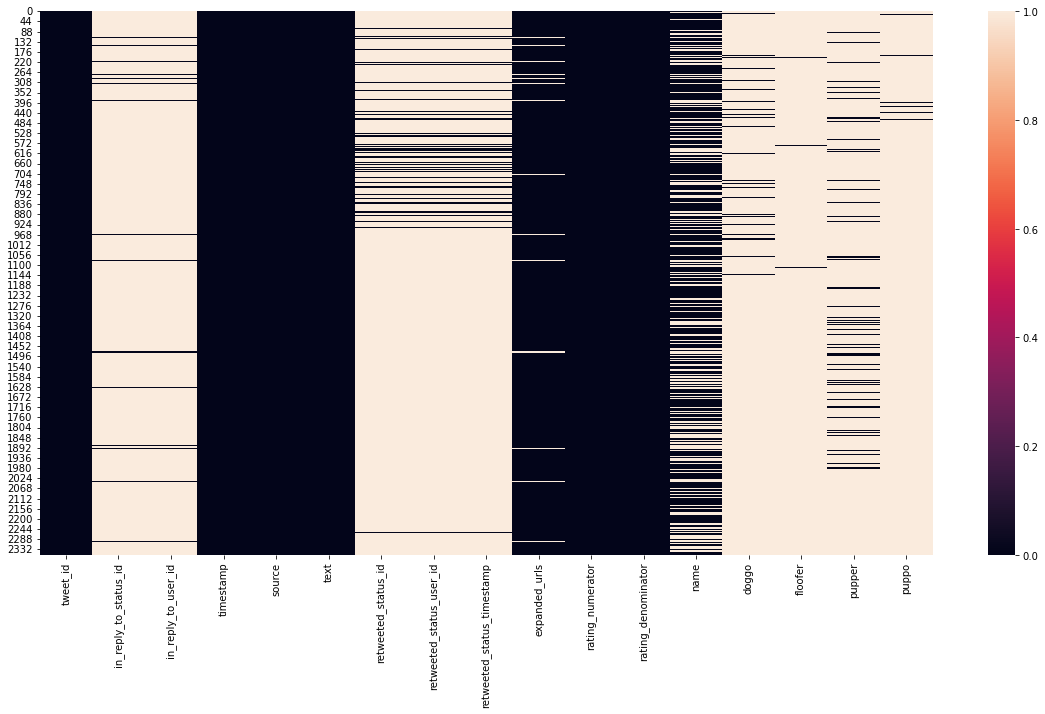

In [10]:
plt.figure(figsize=(20,10))
sns.heatmap(main_df.isnull()) 

In [11]:
main_df.rating_numerator.describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [12]:
main_df.rating_denominator.describe()

count    2356.000000
mean       10.455433
std         6.745237
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

In [13]:
main_df.query('rating_denominator != 10 and name.isnull()')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,NaN,NaN,NaN,NaN,NaN
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,NaN,NaN,NaN,NaN,NaN
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,NaN,NaN,NaN,NaN,NaN
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,NaN,NaN,NaN,NaN,NaN
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244762497024/video/1,165,150,NaN,NaN,NaN,NaN,NaN
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,NaN,NaN,NaN,NaN,NaN
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4,20,NaN,NaN,NaN,NaN,NaN
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603437621249/photo/1,99,90,NaN,NaN,NaN,NaN,NaN
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690886586372/photo/1,80,80,NaN,NaN,NaN,NaN,NaN
1274,709198395643068416,NaN,NaN,2016-03-14 02:04:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","From left to right:\nCletus, Jerome, Ale

On remarque que la plupart des denominateurs sont des multiples de 10 et en verifiant les images des tweets on s'aperçoit que la valeur représente le nombre de chiens dans l'image.

In [14]:
main_df.query('rating_denominator % 10 != 0')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,NaN,NaN,NaN,NaN,NaN
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,NaN,NaN,NaN,NaN
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,NaN,NaN,NaN,NaN,NaN
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,NaN,NaN,NaN,NaN,NaN
1662,682962037429899265,NaN,NaN,2016-01-01 16:30:13 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682962037429899265/photo/1,7,11,Darrel,NaN,NaN,NaN,NaN
1663,682808988178739200,6.827884e+17,4.196984e+09,2016-01-01 06:22:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","I'm aware that I could've said 20/16, but here at WeRateDogs we are very professional. An inconsistent rating scale is simply irresponsible",NaN,NaN,NaN,NaN,20,16,NaN,NaN,NaN,NaN,NaN
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406224695296/photo/1,1,2,an,NaN,NaN,NaN,NaN


Si on ignore les réponses et le retweet, toute les notes présente dans le reste des lignes sont incorrectes.
* 516 : note n'est pas defini
* 1068 : 14/10
* 1662 : 10/10

Pour s'assurer si on n'a pas d'autres cas où la note est incorrecte on vérifiera les textes qui ont deux `/` ou plus.

In [15]:
main_df.loc[main_df.text.str.match(r'^.+(\d+/\d+).+(\d+/\d+).+$') & 
            main_df.in_reply_to_status_id.isnull() & main_df.retweeted_status_id.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
766,777684233540206592,NaN,NaN,2016-09-19 01:42:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","""Yep... just as I suspected. You're not flossing."" 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ",NaN,NaN,NaN,https://twitter.com/dog_rates/status/777684233540206592/photo/1,12,10,NaN,NaN,NaN,NaN,NaN
1007,747600769478692864,NaN,NaN,2016-06-28 01:21:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bookstore and Seaweed. Bookstore is tired and Seaweed is an asshole. 10/10 and 7/10 respectively https://t.co/eUGjGjjFVJ,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/747600769478692864/photo/1,https://twitter.com/dog_rates/status/747600769478692864/photo/1",10,10,Bookstore,NaN,NaN,NaN,NaN
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,NaN,NaN,NaN,NaN,NaN
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4,20,NaN,NaN,NaN,NaN,NaN
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118184652801/photo/1,50,50,Bluebert,NaN,NaN,NaN,NaN
1359,703356393781329922,NaN,NaN,2016-02-26 23:10:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Socks. That water pup w the super legs just splashed him. Socks did not appreciate that. 9/10 and 2/10 https://t.co/8rc5I22bBf,NaN,NaN,NaN,https://twitter.com/dog_rates/status/703356393781329922/photo/1,9,10,Socks,NaN,NaN,NaN,NaN
1459,695064344191721472,NaN,NaN,2016-02-04 02:00:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This may be the greatest video I've ever been sent. 4/10 for Charles the puppy, 13/10 overall. (Vid by @stevenxx_) https://t.co/uaJmNgXR2P",NaN,NaN,NaN,https://twitter.com/dog_rates/status/695064344191721472/video/1,4,10,NaN,NaN,NaN,NaN,NaN
1465,694352839993344000,NaN,NaN,2016-02-02 02:53:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Oliviér. He takes killer selfies. Has a dog of his own. It leaps at random &amp; can't bark for shit. 10/10 &amp; 5/10 https://t.co/6NgsQJuSBJ,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/694352839993344000/photo/1,https://twitter.com/dog_rates/status/694352839993344000/photo/1,https://twitter.com/dog_rates/status/694352839993344000/photo/1,https://twitter.com/dog_rates/status/694352839993344000/photo/1",10,10,Oliviér,NaN,NaN,NaN,NaN
1508,691483041324204033,NaN,NaN,2016-01-25 04:49:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When bae says they can't go out but you see them with someone else that same night. 5/10 &amp; 10/10 for heartbroken pup https://t.co/aenk0KpoWM,NaN,NaN,NaN,"https://tw

index avec note incorrecte : 
* 766 : deux chiens
* 1007 : deux chiens
* 1068 : valeur correcte est 14/10
* 1662 : 10/10
* 1165 : plusieurs chiens
* 1202 : 11/10
* 1459 : video d'un serpent
* 1465 : nom inconnu, note 5/10
* 1508 : 10/10
* 1538 : two dogs
* 1795 : two dogs
* 1901 : 8/10
* 2113 : two dogs
* 2177 : two dogs
* 2263 : la note est en question
* 2272 : 8/10
* 2335 : 9/10

In [16]:
# for tweets with more than one dog put -1 so that we can 
# delete them later
correct_rating_values = {
    766 : -1,
    1007 : -1,
    1068 : "14/10",
    1662 : "10/10",
    1165 : -1,
    1202 : "11/10",
    1459 : -1,
    1465 : "5/10",
    1508 : "10/10",
    1538 : -1,
    1795 : -1,
    1901 : "8/10",
    2113 : -1,
    2177 : -1,
    2272 : "8/10",
    2335 : "9/10"

}

In [17]:
invalid_names = main_df.name[(main_df.name.str.islower()) & (main_df.name != np.NaN)]
print(f"Number of invalid names is : {len(invalid_names)}")
print(invalid_names.unique())
invalid_names_indexes = invalid_names.index.tolist()

Number of invalid names is : 109
['such' 'a' 'quite' 'not' 'one' 'incredibly' 'mad' 'an' 'very' 'just' 'my'
 'his' 'actually' 'getting' 'this' 'unacceptable' 'all' 'old'
 'infuriating' 'the' 'by' 'officially' 'life' 'light' 'space']


Ces valeurs devrait être corrigé.

In [18]:
main_df.duplicated().sum()

0

#### Evaluation du dataframe de predictions : 

In [19]:
preds_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [20]:
preds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [21]:
preds_df.sample(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1478,780601303617732608,https://pbs.twimg.com/media/CtVAvX-WIAAcGTf.jpg,1,Saint_Bernard,0.995143,True,Cardigan,0.003044,True,English_springer,0.001050,True
460,674793399141146624,https://pbs.twimg.com/media/CV1ZA3oWEAA1HW_.jpg,1,giant_schnauzer,0.119693,True,Afghan_hound,0.072763,True,miniature_schnauzer,0.063786,True
1393,767191397493538821,https://pbs.twimg.com/media/CqWcgcqWcAI43jm.jpg,1,patio,0.708665,False,boathouse,0.110056,False,pier,0.039532,False
1904,852189679701164033,https://pbs.twimg.com/media/C9OV99SXsAEmj1U.jpg,1,barrow,0.423150,False,Bernese_mountain_dog,0.415374,True,EntleBucher,0.067345,True
997,708356463048204288,https://pbs.twimg.com/media/CdSWcc1XIAAXc6H.jpg,2,pug,0.871283,True,French_bulldog,0.041820,True,bath_towel,0.015228,False
1879,846514051647705089,https://pbs.twimg.com/media/C79sB4xXwAEvwKY.jpg,2,golden_retriever,0.650003,True,Leonberg,0.065199,True,Norfolk_terrier,0.052955,True
1081,718246886998687744,https://pbs.twimg.com/media/Cfe5tLWXEAIaoFO.jpg,1,Chihuahua,0.354488,True,carton,0.159672,False,Siberian_husky,0.057498,True
860,696900204696625153,https://pbs.twimg.com/media/CavjCdJW0AIB5Oz.jpg,1,Chihuahua,0.297735,True,Pembroke,0.266953,True,basenji,0.136814,True
145,668625577880875008,https://pbs.twimg.com/media/CUdvambWoAA007z.jpg,1,ox,0.071536,False,groenendael,0.054455,True,Angora,0.045028,False
600,679736210798047232,https://pbs.twimg.com/media/CW7oelWWcAAhyzz.jpg,1,French_bulldog,0.319139,True,Chihuahua,0.154088,True,Cardigan,0.117688,True


In [22]:
preds_df.tweet_id.duplicated().sum()

0

In [23]:
preds_df.query('p1_dog == False').p1.unique()

array(['box_turtle', 'shopping_cart', 'hen', 'desktop_computer',
       'three-toed_sloth', 'ox', 'guinea_pig', 'coho', 'llama',
       'seat_belt', 'snail', 'triceratops', 'swab', 'hay', 'hyena',
       'jigsaw_puzzle', 'vacuum', 'teddy', 'porcupine', 'goose', 'hare',
       'electric_fan', 'web_site', 'ibex', 'fire_engine', 'lorikeet',
       'toyshop', 'common_iguana', 'frilled_lizard', 'leatherback_turtle',
       'hamster', 'Angora', 'Arctic_fox', 'trombone', 'canoe',
       'king_penguin', 'shopping_basket', 'bearskin', 'bustard',
       'crash_helmet', 'ski_mask', 'shower_curtain', 'jellyfish',
       'doormat', 'Arabian_camel', 'lynx', 'hog', 'comic_book', 'minivan',
       'seashore', 'cuirass', 'candle', 'weasel', 'Christmas_stocking',
       'washbasin', 'car_mirror', 'piggy_bank', 'pot', 'boathouse',
       'mud_turtle', 'platypus', 'ping-pong_ball', 'sea_urchin',
       'bow_tie', 'window_shade', "jack-o'-lantern", 'sorrel', 'peacock',
       'axolotl', 'wool', 'banana', '

In [24]:
preds_df.img_num.unique()

array([1, 4, 2, 3])

In [25]:
preds_df.p1.unique()

array(['Welsh_springer_spaniel', 'redbone', 'German_shepherd',
       'Rhodesian_ridgeback', 'miniature_pinscher',
       'Bernese_mountain_dog', 'box_turtle', 'chow', 'shopping_cart',
       'miniature_poodle', 'golden_retriever', 'Gordon_setter',
       'Walker_hound', 'pug', 'bloodhound', 'Lhasa', 'English_setter',
       'hen', 'desktop_computer', 'Italian_greyhound', 'Maltese_dog',
       'three-toed_sloth', 'ox', 'malamute', 'guinea_pig',
       'soft-coated_wheaten_terrier', 'Chihuahua',
       'black-and-tan_coonhound', 'coho', 'toy_terrier',
       'Blenheim_spaniel', 'Pembroke', 'llama',
       'Chesapeake_Bay_retriever', 'curly-coated_retriever', 'dalmatian',
       'Ibizan_hound', 'Border_collie', 'Labrador_retriever', 'seat_belt',
       'snail', 'miniature_schnauzer', 'Airedale', 'triceratops', 'swab',
       'hay', 'hyena', 'jigsaw_puzzle', 'West_Highland_white_terrier',
       'toy_poodle', 'giant_schnauzer', 'vizsla', 'vacuum', 'Rottweiler',
       'Siberian_husky', 't

In [26]:
preds_df.p1_conf.describe()

count    2075.000000
mean        0.594548
std         0.271174
min         0.044333
25%         0.364412
50%         0.588230
75%         0.843855
max         1.000000
Name: p1_conf, dtype: float64

In [27]:
preds_df.p2_conf.describe()

count    2.075000e+03
mean     1.345886e-01
std      1.006657e-01
min      1.011300e-08
25%      5.388625e-02
50%      1.181810e-01
75%      1.955655e-01
max      4.880140e-01
Name: p2_conf, dtype: float64

In [28]:
preds_df.p3_conf.describe()

count    2.075000e+03
mean     6.032417e-02
std      5.090593e-02
min      1.740170e-10
25%      1.622240e-02
50%      4.944380e-02
75%      9.180755e-02
max      2.734190e-01
Name: p3_conf, dtype: float64

In [29]:
preds_df.duplicated().sum()

0

#### Evaluation du dataframe de nombre de retweets et de likes : 

In [30]:
df_api

,tweet_id,likes_count,retweets_count
0,892420643555336193,33711,6975
1,892177421306343426,29234,5276
2,891815181378084864,21982,3466
3,891689557279858688,36808,7197
4,891327558926688256,35191,7721
...,...,...,...
2322,666049248165822465,88,36
2323,666044226329800704,246,115
2324,666033412701032449,100,36
2325,666029285002620928,112,39


In [31]:
df_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2327 non-null   object
 1   likes_count     2327 non-null   int64 
 2   retweets_count  2327 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 54.7+ KB


In [32]:
df_api.likes_count.describe()

count      2327.000000
mean       7029.859046
std       10924.374338
min           0.000000
25%        1220.500000
50%        3039.000000
75%        8568.500000
max      144322.000000
Name: likes_count, dtype: float64

In [33]:
likes_zero_df = df_api.query('likes_count == 0 ')

Verifions si on a bien des zéros au niveau de la réponse des requetes en utilisant le premier tweet_id:

![title](img/request.png)

Le fait qu'il y a des retweets et aucun like semble un peu étrange, verifions au niveau du site de twitter le nombre de likes du tweet "886054160059072513":

![title](img/twitter_likes.png)

Le tweet a 1364 likes alors que la réponse de la requête renvois zéro. Apprès avoir faire une recherche il apparait que dans la version 2 de l'api de twitter le nombre de likes est toujours renvoyé avec 0 dans le cas des retweets, il faudra accéder au tweet d'origine pour avoir le nombre de likes.

Verifons si tout les tweet id ayant un zero likes sont des retweets : 

In [34]:
main_df.loc[main_df.tweet_id.isin(likes_zero_df.tweet_id)].retweeted_status_id.isnull().sum()

0

In [35]:
df_api.retweets_count.describe()

count     2327.000000
mean      2460.012033
std       4166.054961
min          1.000000
25%        492.500000
50%       1144.000000
75%       2846.000000
max      70371.000000
Name: retweets_count, dtype: float64

In [36]:
df_api.query("retweets_count == 1")

,tweet_id,likes_count,retweets_count
277,838085839343206401,133,1


### Quality issues
1. La colonne des urls contient des doublons au niveaux de la meme ligne (index = 1280, 1288). 

2. Quelques noms de chiens sont erronné. 

3. Le dataset contient des retweets et des réponses qui devraient etre supprimé. 

4. Notes incorrectes. (à consulter la variable <correct_rating_values>) 

5. Quelques predictions ne correspondent pas à des chiens.

6. Données manquantes au niveau des colonnes suivantes :les etapes des chiens, le nom et l'url.

7. La colonne timestamp devrait etre de type date.

8. tweet_id dans le dernier dataframe est de type string alors que dans les deux autres datarames la colonnne est de type entier. 

9. Il y a des tweets avec deux étapes de chiens. 

10. Le nom du tweet ayant l'index (1465) est inconnu alors que le nom indiqué est Oliver. 

11. Les lignes à l'index : 2263, 516 n' ont pas de notes.


### Tidiness issues
1. les trois dataframes concernent les tweets donc devrait etre rassemlé en un seul dataframe

2. les colonnes concernat les stades des chiens devrait etre une seule variable categorique avec les valeurs etant les noms des colonnes.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [37]:
# Make copies of original pieces of data
archive_df = main_df.copy()
preds_df_copy = preds_df.copy()
api_df_copy = df_api.copy()

### Issue #1: Le dataset contient des retweets et des réponses qui devraient etre supprimé

#### Define:
-Supprimer les retweets et les réponses

#### Code:

In [38]:
retweets_idx = archive_df.query('not retweeted_status_id.isnull()').index
print(retweets_idx)
archive_df.drop(retweets_idx, axis=0, inplace=True)

Int64Index([  19,   32,   36,   68,   73,   74,   78,   91,   95,   97,
            ...
             926,  937,  943,  949, 1012, 1023, 1043, 1242, 2259, 2260],
           dtype='int64', length=181)


In [39]:
replies_index = archive_df.query('not in_reply_to_user_id.isnull()').index
print(replies_index)
archive_df.drop(replies_index, axis=0, inplace=True)

Int64Index([  30,   55,   64,  113,  148,  149,  179,  184,  186,  188,  189,
             218,  228,  234,  251,  274,  290,  291,  313,  342,  346,  387,
             409,  427,  498,  513,  565,  570,  576,  611,  701,  843,  857,
             967, 1005, 1016, 1018, 1080, 1127, 1295, 1330, 1339, 1345, 1356,
            1446, 1452, 1464, 1474, 1479, 1497, 1501, 1523, 1598, 1605, 1618,
            1630, 1634, 1663, 1689, 1774, 1819, 1842, 1844, 1852, 1866, 1882,
            1885, 1892, 1895, 1905, 1914, 1940, 2036, 2038, 2149, 2169, 2189,
            2298],
           dtype='int64')


#### Test:

In [40]:
archive_df.query('not retweeted_status_id.isnull()')
archive_df.shape

(2097, 17)

In [41]:
archive_df.query('not in_reply_to_user_id.isnull()')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #2 : Le nom du tweet ayant l'index (1465) est inconnu alors que le nom indiqué est Oliver.

#### Define:
- Remplacer le nom par 0

#### Code:

In [42]:
archive_df.loc[1465, "name"] = 0

#### Test

In [43]:
archive_df.loc[1465, "name"]

0

### Issue # 3 : Les lignes à l'index : 2263, 516 n' ont pas de note 

#### Define:
- Supprimer ces deux lignes

#### Code:

In [44]:
archive_df.drop([516, 2263], axis=0, inplace = True)

#### Test:

In [45]:
assert (516 not in archive_df.index.to_list()) & (2263 not in archive_df.index.to_list())

### Issue #4: Données manquantes au niveau des colonnes suivantes (les étapes des chiens, le nom et l'url)

#### Define:
- Remplacer les données manquantes des urls par : "https://twitter.com/TwitterAPI/status" + tweet_id
- Examiner les textes des noms avec valeur manquante pour voir si la valeur existe sinon replacer par 0
- Examiner les textes pour voir si les étapes manquantes existes sinon remplacer par 0

#### Code

##### URL

In [46]:
#%%timeit
TWEET_BASE_URL = "https://twitter.com/dog_rates/status/"

empty_urls_ind = archive_df.query('expanded_urls.isnull()').index.tolist() 
new_urls = ['{}{}'.format(TWEET_BASE_URL, id) for id in archive_df.iloc[empty_urls_ind].tweet_id]
archive_df.loc[archive_df.expanded_urls.isnull(), 'expanded_urls'] = new_urls


##### NAME

In [47]:
# check first word unique values if there is a name
# check if there is a middle word with upper case
# or extract words with upper case and check unique values if possible
empty_names_df = archive_df.query('name.isnull()')
print(empty_names_df.shape)
upper_case_words = empty_names_df.text.str.extract(r'([A-Z][a-z]+)', expand = False).unique()
len(upper_case_words)

(603, 17)


247

In [48]:
upper_case_words

array(['Here', 'When', 'You', 'This', 'Howard', 'Pup', 'Wubj', 'Please',
       'Ugh', 'Martha', 'Tsu', 'Guys', 'We', 'Never', 'Real',
       'Unbelievable', 'Oh', 'He', 'Sq', 'Sorry', 'They', 'Instead', nan,
       'Ejz', 'Sometimes', 'At', 'Seriously', 'Gcq', 'Gu', 'Took', 'Ax',
       'Atlas', 'Wxw', 'Prosperous', 'Friday', 'Dog', 'Beebop', 'Retweet',
       'Badlands', 'The', 'Zlp', 'Some', 'Looks', 'Name', 'Happy',
       'Everybody', 'Jake', 'Blep', 'Good', 'Hooman', 'Pupper', 'Rr',
       'Im', 'Mbr', 'Elder', 'Your', 'Vine', 'Did', 'Honestly', 'Today',
       'Who', 'Idk', 'Ou', 'Have', 'Loki', 'Evolution', 'Yep', 'Ohu',
       'Doggo', 'Another', 'Zdus',
       'Ohboyohboyohboyohboyohboyohboyohboyohboyohboyohboyohboyohboyohboyohboyohboy',
       'No', 'Why', 'In', 'Teagan', 'She', 'All', 'Pwease', 'So',
       'Nothing', 'Hopefully', 'And', 'Pause', 'Duuun', 'Bark', 'Stop',
       'Pfe', 'Pls', 'Again', 'For', 'Was', 'After', 'Don', 'Just',
       'Right', 'Tx', 'Ello', 'Like'

In [49]:
possible_names = ['Howard', 'Martha', 'Penelope', 'Jack', 'Nih', 'Marc', 'Aaron',
                'Jenna', 'Jerry', 'Toby', 'Yto', 'Cannon', 'Kevin', 'Kiba', 'Andy', 'Kenny', 'Schafe', 'Atlas', 'Lin'
                , 'Emilie', 'Jake', 'Augie', 'Chino', 'Sky', 'Vine', 'Loki', 'Tristan', 'Teagan',
                'Pwease', 'Ello', 'Pipsy', 'Donald', 'Yoshi', 'Bubka']

name_lookup_regex = ""
for name in possible_names:
    name_lookup_regex = name_lookup_regex + name + '|'

print(name_lookup_regex[:-1])
mask_lookup_names = empty_names_df.text.str.contains(name_lookup_regex[:-1], regex = True)
possible_names_ind = empty_names_df.loc[mask_lookup_names].index.tolist()
empty_names_df.loc[possible_names_ind].text

Howard|Martha|Penelope|Jack|Nih|Marc|Aaron|Jenna|Jerry|Toby|Yto|Cannon|Kevin|Kiba|Andy|Kenny|Schafe|Atlas|Lin|Emilie|Jake|Augie|Chino|Sky|Vine|Loki|Tristan|Teagan|Pwease|Ello|Pipsy|Donald|Yoshi|Bubka


35                                                                                             I have a new hero and his name is Howard. 14/10 https://t.co/gzLHboL7Sk
72                                                                                               Martha is stunning how h*ckin dare you. 13/10 https://t.co/9uABQXgjwa
191     Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel
275                                                  I didn't even have to intervene. Took him 4 minutes to realize his error. 10/10 for Kevin https://t.co/2gclc1MNr7
306                 Atlas is back and this time he's prettier than the sunset. Seems to be aware of it too. 13/10 would give modeling contract https://t.co/uRdKlFArQE
413                                                    Here's a super supportive puppo participating in the Toronto  #WomensMarch today. 13/10 https://t.co/nTz3FtorB

Les noms à remplacer : 
* 35 : Howard
* 72 : Martha
* 275 : kevin
* 306 : atlas
* 508 : Jake
* 657 : Vine
* 684 : Atlas
* 758 : Loki
* 774 : Atlas
* 906 : Teagan
* 920 : Pwease
* 1609 : Jack
* 1684 : Toby 


In [50]:
names_dict = {
    35: "Howard",
    72: "Martha",
    275 : "Kevin",
    306: "Atlas",
    508: "Jake",
    657: "Vine",
    684: "Atlas",
    758: "Loki",
    774: "Atlas",
    906: "Teagan",
    920: "Pwease",
    1609 : "Jack",
    1684 : "Toby"
}


for index, name in names_dict.items():
    archive_df.loc[index, "name"] = name

print(list(names_dict.keys()))
archive_df.loc[list(names_dict.keys()), "name"]


[35, 72, 275, 306, 508, 657, 684, 758, 774, 906, 920, 1609, 1684]


35      Howard
72      Martha
275      Kevin
306      Atlas
508       Jake
657       Vine
684      Atlas
758       Loki
774      Atlas
906     Teagan
920     Pwease
1609      Jack
1684      Toby
Name: name, dtype: object

In [51]:
archive_df.name.isnull().sum()

590

On a arrivé à réduire le nombre des noms manquants de 603 à 590, pour le reste des valeurs manquantes on les remplaçera par 0.

In [52]:
archive_df.loc[archive_df.name.isnull(), 'name'] = 0

##### Etapes des chiens

In [53]:
empty_dog_stage_df = archive_df.query("doggo.isnull() & floofer.isnull() & pupper.isnull() & puppo.isnull()")
empty_dog_stage_df.shape

(1759, 17)

In [54]:
# check text for dogs with empty stage to see if we can find something

rows_to_correct = empty_dog_stage_df.loc[empty_dog_stage_df.text.str.contains("doggo|floofer|pupper|puppo", regex=True)]
print(f'Number of rows to correct : {rows_to_correct.shape[0]}')
correct_values = rows_to_correct.text.str.extract(r'(doggo|floofer|pupper|puppo)', expand=False)

# replace nan by correct values
for ind in correct_values.index:
    if correct_values[ind] == "floofer":
        archive_df.loc[ind, "floofer"] = "floofer"
    elif correct_values[ind] == "pupper":
        archive_df.loc[ind, "pupper"] = "pupper"
    elif correct_values[ind] == "puppo":
        archive_df.loc[ind, "puppo"] = "puppo"
    elif correct_values[ind] == "doggo":
        archive_df.loc[ind, "doggo"] = "doggo"

archive_df.loc[correct_values.index.tolist()]

Number of rows to correct : 36


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
54,881666595344535552,NaN,NaN,2017-07-03 00:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Gary. He couldn't miss this puppertunity for a selfie. Flawless focusing skills. 13/10 would boop intensely https://t.co/7CSWCl8I6s,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881666595344535552/photo/1,13,10,Gary,NaN,NaN,pupper,NaN
83,876537666061221889,NaN,NaN,2017-06-18 20:30:39 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I can say with the pupmost confidence that the doggos who assisted with this search are heroic as h*ck. 14/10 for all https://t.co/8yoc1CNTsu,NaN,NaN,NaN,https://twitter.com/mpstowerham/status/876162994446753793,14,10,0,doggo,NaN,NaN,NaN
85,876120275196170240,NaN,NaN,2017-06-17 16:52:05 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Meet Venti, a seemingly caffeinated puppoccino. She was just informed the weekend would include walks, pats and scritches. 13/10 much excite https://t.co/ejExJFq3ek",NaN,NaN,NaN,https://twitter.com/dog_rates/status/876120275196170240/photo/1,13,10,Venti,NaN,NaN,NaN,puppo
106,871879754684805121,NaN,NaN,2017-06-06 00:01:46 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to Lassie. She's celebrating #PrideMonth by being a splendid mix of astute and adorable. Proudly supupporting her owner. 13/10 https://t.co/uK6PNyeh9w,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/871879754684805121/photo/1,https://twitter.com/dog_rates/status/871879754684805121/photo/1",13,10,Lassie,NaN,NaN,NaN,puppo
134,866686824827068416,NaN,NaN,2017-05-22 16:06:55 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Lili. She can't believe you betrayed her with bath time. Never looking you in the eye again. 12/10 would puppologize profusely https://t.co/9b9J46E86Z,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/866686824827068416/photo/1,https://twitter.com/dog_rates/status/866686824827068416/photo/1",12,10,Lili,NaN,NaN,NaN,puppo
268,841439858740625411,NaN,NaN,2017-03-14 00:04:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have some incredible doggos for #K9VeteransDay. All brave as h*ck. Salute your dog in solidarity. 14/10 for all https://t.co/SVNMdFqKDL,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/841439858740625411/photo/1,https://twitter.com/dog_rates/status/841439858740625411/photo/1,https://twitter.com/dog_rates/status/841439858740625411/photo/1,https://twitter.com/dog_rates/status/841439858740625411/photo/1",14,10,0,doggo,NaN,NaN,NaN
296,837366284874571778,NaN,NaN,2017-03-02 18:17:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Lucy. She has a portrait of herself on her ear. Excellent for identification pupposes. 13/10 innovative af https://t.co/uNmxbL2lns,NaN,NaN,NaN,https://twitter.com/dog_rates/status/837366284874571778/photo/1,13,10,Lucy,NaN,NaN,NaN,puppo
477,815990720817401858,NaN,NaN,2017-01-02 18:38:42 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jack. He's one of the rare doggos that doesn't mind baths. 11/10 click the link to see how you can help Jack!\n\nhttps://t.co/r4W111FzAq https://t.co/fQpYuMKG3p,NaN,NaN,NaN,"https://www.gofundme.com/surgeryforjacktheminpin,https://twitter.com/dog_rates/status/815990720817401858/photo/1",11,10,Jack,doggo,NaN,NaN,NaN
545,805826884734976000,NaN,NaN,2016-12-05 17:31:15 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Duke. He is not a fan of t

In [55]:
archive_df.loc[(archive_df.doggo.isnull()) & (archive_df.floofer.isnull()) &
             (archive_df.pupper.isnull()) & (archive_df.puppo.isnull()), ["doggo","floofer", "pupper", "puppo"]] = 0

#### Test

In [56]:
# URL
print(archive_df.expanded_urls.isnull().sum())
archive_df.expanded_urls.sample(10)

0


1530                                                                    https://twitter.com/dog_rates/status/690021994562220032/photo/1
990                                                                     https://twitter.com/dog_rates/status/748705597323898880/video/1
933                                                                     https://twitter.com/dog_rates/status/753655901052166144/photo/1
82      https://twitter.com/dog_rates/status/876838120628539392/photo/1,https://twitter.com/dog_rates/status/876838120628539392/photo/1
1153                                                                    https://twitter.com/dog_rates/status/725729321944506368/photo/1
573                                                                     https://twitter.com/dog_rates/status/801167903437357056/photo/1
982                                                                     https://twitter.com/dog_rates/status/749403093750648834/photo/1
1886                                            

In [57]:
# Name
print(archive_df.name.isnull().sum())
archive_df.name.sample(20)

0


213           0
1130          0
776     Sampson
2346        the
1949          0
1145      Karll
1549       Ferg
1614    Petrick
2205    Churlie
1480    Lincoln
34       Maisey
1869          0
563      Winnie
82       Ginger
2095    Vincent
1739    William
670       Happy
1179        Sid
1643      Sadie
1565       Kilo
Name: name, dtype: object

In [58]:
# Dog stage
print(archive_df.query("doggo.isnull() & floofer.isnull() & pupper.isnull() & puppo.isnull()").shape)
archive_df[["doggo", "floofer", "pupper", "puppo"]].sample(20)

(0, 17)


,doggo,floofer,pupper,puppo
1838,NaN,NaN,pupper,NaN
2197,0,0,0,0
533,NaN,NaN,pupper,NaN
540,0,0,0,0
1172,0,0,0,0
229,0,0,0,0
1419,0,0,0,0
2248,0,0,0,0
936,0,0,0,0
225,0,0,0,0


### Issue #5 : Notes incorrectes. (à consulter la variable <correct_rating_values>) 

#### Define:
- Corriger les notes et supprimer les lignes avec plus de deux chiens

#### Code:

In [59]:
print(correct_rating_values)
for index, rating in correct_rating_values.items():
    if rating != -1:
        rating = rating.split("/")
        archive_df.loc[index, ['rating_numerator', 'rating_denominator']] = [int(rating[0]), int(rating[1])]
    else: archive_df.drop(index, axis =0, inplace=True, errors='ignore')

{766: -1, 1007: -1, 1068: '14/10', 1662: '10/10', 1165: -1, 1202: '11/10', 1459: -1, 1465: '5/10', 1508: '10/10', 1538: -1, 1795: -1, 1901: '8/10', 2113: -1, 2177: -1, 2272: '8/10', 2335: '9/10'}


#### Test:

In [60]:
assert (archive_df.rating_denominator.dtype == int) & (archive_df.rating_numerator.dtype == int)
new_rating_indx = {index for index in correct_rating_values.keys() if correct_rating_values[index]!=-1}
archive_df.loc[new_rating_indx]

/tmp/ipykernel_29771/3774972138.py:3: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  archive_df.loc[new_rating_indx]


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2272,667491009379606528,NaN,NaN,2015-11-19 23:53:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Two dogs in this one. Both are rare Jujitsu Pythagoreans. One slightly whiter than other. Long legs. 7/10 and 8/10 https://t.co/ITxxcc4v9y,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667491009379606528/photo/1,8,10,0,0,0,0,0
1508,691483041324204033,NaN,NaN,2016-01-25 04:49:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When bae says they can't go out but you see them with someone else that same night. 5/10 &amp; 10/10 for heartbroken pup https://t.co/aenk0KpoWM,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/691483041324204033/photo/1,https://twitter.com/dog_rates/status/691483041324204033/photo/1,https://twitter.com/dog_rates/status/691483041324204033/photo/1,https://twitter.com/dog_rates/status/691483041324204033/photo/1",10,10,0,0,0,0,0
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",14,10,0,0,0,0,0
1901,674646392044941312,NaN,NaN,2015-12-09 17:46:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Two gorgeous dogs here. Little waddling dog is a rebel. Refuses to look at camera. Must be a preteen. 5/10 &amp; 8/10 https://t.co/YPfw7oahbD,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674646392044941312/photo/1,8,10,0,0,0,0,0
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118184652801/photo/1,11,10,Bluebert,0,0,0,0
1465,694352839993344000,NaN,NaN,2016-02-02 02:53:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Oliviér. He takes killer selfies. Has a dog of his own. It leaps at random &amp; can't bark for shit. 10/10 &amp; 5/10 https://t.co/6NgsQJuSBJ,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/694352839993344000/photo/1,https://twitter.com/dog_rates/status/694352839993344000/photo/1,https://twitter.com/dog_rates/status/694352839993344000/photo/1,https://twitter.com/dog_rates/status/694352839993344000/photo/1",5,10,0,0,0,0,0
1662,682962037429899265,NaN,NaN,2016-01-01 16:30:13 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682962037429899265/photo/1,10,10,Darrel,0,0,0,0
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406224695296/photo/1,9,10,an,0,0,0,0


### Issue #6: les colonnes concernant les stades des chiens devrait etre une seule variable categorique avec les valeurs etant les noms des colonnes

#### Define
- Regrouper les colonnes des stades en une une seule variable

#### Code

In [61]:
id_vars = np.delete(archive_df.columns.values, ([-1, -2, -3, -4]))
print(id_vars)
new_archive_df = pd.melt(archive_df, id_vars = id_vars , value_vars = ["doggo", "floofer", "pupper", "puppo"], var_name = "stage")
new_archive_df.query("tweet_id == 892420643555336193")

['tweet_id' 'in_reply_to_status_id' 'in_reply_to_user_id' 'timestamp'
 'source' 'text' 'retweeted_status_id' 'retweeted_status_user_id'
 'retweeted_status_timestamp' 'expanded_urls' 'rating_numerator'
 'rating_denominator' 'name']


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage,value
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,doggo,0
2087,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,floofer,0
4174,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,pupper,0
6261,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,puppo,0


In [62]:
# drop lines where the value is null
null_stage_ind = new_archive_df.query("value.isnull()").index.to_list()
new_archive_df.drop(null_stage_ind, axis= 0, inplace = True)
# if the same tweet id has 4 zeros for all 4 stages then put a zero for the stage of that tweet
# Get tweet ids where all stages are zeros then remove duplicates based on tweet id since having
# a zero in one tweet stage means that no stage was defined for that tweet
empty_stage_df = new_archive_df.loc[new_archive_df.value == 0].drop_duplicates(subset="tweet_id")
new_archive_df.drop(new_archive_df.query("value == 0").index.tolist(), axis = 0, inplace = True)
new_archive_df = pd.concat([new_archive_df, empty_stage_df], axis = 0)
# delete stage column and rename value column
new_archive_df.drop(columns=['stage'], inplace=True)
new_archive_df.rename(columns={"value" : "stage"}, inplace=True)

#### Test

In [63]:
# make sure that number of rows of new df = rows of old df + #duplicated stages
# since after melt we kept all stages that were not null.

# Let's first find how many tweets have more than one stage
duplicated_tweets = new_archive_df.tweet_id.duplicated().sum()
print(f'Number of duplicated tweets : {duplicated_tweets}')

assert archive_df.shape[0] + duplicated_tweets == new_archive_df.shape[0]

Number of duplicated tweets : 11


### Issue #7: Il y a des tweets avec deux valeurs au niveau des étapes des chiens

#### Define:
- Chercher les tweet id où il y a plus qu'une étape
- Examiner les textes de ces tweet pour trouver l'etape correcte
- Creer un dictionaire de tweet id et étape correcte puis supprimer toutes les 
lignes où le tweet n a pas la valeur correcte

#### Code:

In [64]:
dupl_stage_tweet_id = new_archive_df.loc[new_archive_df.tweet_id.duplicated(), 'tweet_id'].unique()
new_archive_df.query("tweet_id.isin(@dupl_stage_tweet_id)")[["tweet_id", "text"]].drop_duplicates()

,tweet_id,text
154,855851453814013952,Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel
161,854010172552949760,"At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk"
358,817777686764523521,"This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7"
415,808106460588765185,Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho
445,801115127852503040,This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj
535,785639753186217984,This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd
561,781308096455073793,"Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u"
687,759793422261743616,"Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll"
746,751583847268179968,Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8
845,741067306818797568,This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC


- 855851453814013952 : puppo
- 854010172552949760 : Floofer
- 817777686764523521 : pupper
- 808106460588765185 : two dogs
- 801115127852503040 : pupper
- 785639753186217984 : doggo
- 781308096455073793 : two dogs
- 759793422261743616 : two dogs
- 751583847268179968 : doggo
- 741067306818797568 : two dogs
- 733109485275860992 : two dogs

In [65]:
correct_stage = {
    855851453814013952 : "puppo",
    854010172552949760 : "floofer",
    817777686764523521 : "pupper",
    801115127852503040 : "pupper",
    785639753186217984 : "doggo",
    751583847268179968 : "doggo",
    808106460588765185 : 0,
    781308096455073793 : 0,
    759793422261743616 : 0,
    741067306818797568 : 0,
    733109485275860992 : 0
}

# we will fix wrong stages and delete tweets with more than one dog
for tweet_id, stage in correct_stage.items():
    if stage != 0:
        index_to_delete = new_archive_df.query("tweet_id == @tweet_id & stage != @stage").index
    else: index_to_delete = new_archive_df.query("tweet_id == @tweet_id").index
    new_archive_df.drop(index_to_delete, axis = 0, inplace = True)


#### Test:

In [66]:
# test make sure that 16 rows were deleted + check stage values
old_lines_num = archive_df.shape[0] + 11
print(old_lines_num - new_archive_df.shape [0])
assert new_archive_df.shape[0] == (old_lines_num - 16)

16


In [67]:
new_archive_df.query("tweet_id.isin(@correct_stage.keys())")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage
535,785639753186217984,NaN,NaN,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/785639753186217984/photo/1,https://twitter.com/dog_rates/status/785639753186217984/photo/1",10,10,Pinot,doggo
746,751583847268179968,NaN,NaN,2016-07-09 01:08:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8,NaN,NaN,NaN,https://twitter.com/dog_rates/status/751583847268179968/photo/1,5,10,0,doggo
2248,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/854010172552949760/photo/1,https://twitter.com/dog_rates/status/854010172552949760/photo/1",11,10,0,floofer
4532,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686764523521/video/1,13,10,Dido,pupper
4619,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/801115127852503040/photo/1,https://twitter.com/dog_rates/status/801115127852503040/photo/1",12,10,Bones,pupper
6415,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453814013952/photo/1,13,10,0,puppo


### Issue #8: Quelques noms de chiens sont erronné 

#### Define:
- Examiner les textes des indexes des noms erroné
- Corriger les noms

#### Code:

In [68]:
names = new_archive_df.query("name !=0").name
names_to_correct_indx = names[names.str.islower()].index
# build regex for excluding words that are not names
words_to_exclude = ['The', 'He', 'She', 'This', 'That', 'Upset', 'Actually', 'Say', 'Zooming',
                    'Great', 'Pupper', 'Just', 'What']
negative_regex = "(?!"
for word in words_to_exclude:
    negative_regex = negative_regex + word + '|'
negative_regex = negative_regex[:-1] + ")"
# extracting possible names from text
new_archive_df.loc[names_to_correct_indx, 'text'].str.extractall(negative_regex + '([A-Z][a-z]{3,})')
# 783 not a dog
# we will now explore the values manually to check for possible names

0
     match                      
781  0                    Quizno
4956 0                      Adtn
5005 0                   Alaskan
     1                      Bush
     2                      Hard
     3                    Cdpzaa
5853 0                      Riyd
21   0                Venezuelan
     1                     Hover
     2                    Wiener
141  0                     Thank
156  0                      Guys
     1                    Please
     2                     Thank
263  0                   Airport
289  0              Occasionally
     1                     Grace
423  0                    Please
     1                  Freudian
     2                      Poof
     3                      Lion
     4                      Bvhi
493  0                   Forrest
614  0                      Guys
     1                 Galapagos
     2                     Speed
     3                     Panda
629  0                    Arctic
     1                     Floof
     2                  Kangaroo
655  0                      Zoey
     1                      Yoiw
777  0                     Thank
791  0                     Human
793  0                    Viewer
802  0                    Please
808  0                     Iraqi
     1                     Speed
     2                  Kangaroo
     3                    Please
814  0                  Jamaican
     1                      Flop
     2                      Seal
853  0                   Mexican
     1                    Golden
     2                    Beaver
     3                      Only
878  0                    Please
     1                   Alaskan
     2                      Flop
     3                    Turtle
     4                      Atxc
902  0                 Bulgarian
     1                   Eyeless
     2                     Porch
     3                      Bear
972  0                    People
     1                    Deadly
     2             Mediterranean
     3                      Plop
     4                      Only
     5                    Thanks
986  0                    Please
     1                      Dogs
     2                     Thank
1037 0                     Dutch
     1                     Panda
     2                      Worm
1134 0                 Butternut
     1               Cumberfloof
     2                     Mjzhd
1135 0                      East
     1                   African
     2                   Chalupa
     3                      Seal
     4                    Please
     5                     Thank
1141 0                      Wild
     1                    Tuscan
     2                Poofwiggle
     3                   Careful
     4                      Rare
1158 0                 Mongolian
1208 0                    Please
     1                     Nueou
1265 0                    Arctic
     1               Wubberfloof
     2                  Unamused
1291 0                      Stop
     1                     Thank
1449 0                     Thank
     1                      Qxap
1480 0                 Downright
1493 0                      Guys
1603 0                   Sizzlin
     1                   Menorah
     2                  Brooklyn
     3                     Wylie
     4                   Lovable
     5                   Chiller
1604 0                 Seriously
     1                      Only
1626 0                    Please
     1                     Thank
1627 0                   Bacardi
     1                  Columbia
     2                 Excellent
1666 0                Sagitariot
     1                   Baklava
     2                     Loves
1683 0                     Loves
     1                    Nobody
     2                    Always
1697 0                    Lofted
     1               Aphrodisiac
     2                   Terrier
     3                      Fits
1736 0                      Rand
     1                      Paul
     2                     Curls
1743 

#### Test:

In [69]:
new_archive_df.name[(new_archive_df.name !=0) & new_archive_df.name.str.islower()]

718              one
781              his
901             this
4225               a
4956             one
4997        actually
5005               a
5050             mad
5092             all
5289               a
5299               a
5329               a
5402            just
5539             the
5725             the
5853             one
21              such
141            quite
156            quite
263              not
289              one
423       incredibly
493                a
614                a
629             very
655               my
777              not
791                a
793                a
802                a
808               an
814             very
853          getting
878             very
902     unacceptable
972                a
985              old
986                a
1037     infuriating
1134               a
1135              an
1141               a
1158            very
1208         getting
1265               a
1291             the
1449        actually
1480         

### Issue #9: Quelques predictions ne correspondent pas à des chiens
#### Define:
- Supprimer les predictions qui ne correspondent pas à des chiens

#### Code:

In [70]:
not_dog_index = preds_df_copy.query('p1_dog == False').index
preds_df_copy.drop(not_dog_index, axis = 0, inplace = True)

#### Test:

In [71]:
assert len(preds_df_copy.query('p1_dog == False')) == 0

### Issue # 10 : La colonne des urls contient des doublons au niveaux de la meme ligne

#### Define:
- Supprimer les valeurs duppliqué

#### Code:

In [72]:
def remove_duplicates(lst):
    return set(lst)

new_archive_df['expanded_urls'] = new_archive_df.expanded_urls.str.split(',').apply(remove_duplicates)



#### Test:

In [73]:
new_archive_df.expanded_urls.sample(20)

1358                                                                                            {https://twitter.com/dog_rates/status/686358356425093120/photo/1}
702                                                                                             {https://twitter.com/dog_rates/status/758041019896193024/photo/1}
1082                                                                                            {https://twitter.com/dog_rates/status/707387676719185920/photo/1}
1215                                                                                            {https://twitter.com/dog_rates/status/696754882863349760/photo/1}
5048                                                                                            {https://twitter.com/dog_rates/status/737310737551491075/video/1}
805                                                                                             {https://twitter.com/dog_rates/status/746726898085036033/photo/1}
5055                        

### Issue #11 : Les lignes ayant un numerateur 0 ne contiennent pas d'informations utiles et peuvent etre supprimé.

#### Define:
- Supprimer les lignes avec numerateur = 0

#### Code:

In [74]:
new_archive_df.drop(new_archive_df.query('rating_numerator == 0').index, axis=0, inplace=True)

#### Test:

In [75]:
new_archive_df.query("rating_numerator == 0")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage


### Issue 12 : La colonne timestamp devrait etre de type date

#### Define:
- Changer le type de la colonne timestamp à date

### Code:

In [76]:
new_archive_df.timestamp = pd.to_datetime(new_archive_df.timestamp)

#### Test:

In [77]:
new_archive_df['timestamp'].dtype

datetime64[ns, UTC]

### Issue #13 : tweet_id dans le dernier dataframe est de type string alors que dans les deux autres datarames la colonnne est de type entier

#### Define:
- Transformer le type de tweet_id dans les deux autre dataframes au type string

#### Code:

In [78]:
preds_df_copy.tweet_id = preds_df_copy.tweet_id.astype('str')
new_archive_df.tweet_id = new_archive_df.tweet_id.astype('str')

#### Test:

In [79]:
assert (preds_df_copy.tweet_id.dtype == 'object') & (new_archive_df.tweet_id.dtype == 'object')

### Issue #14: les trois dataframes concernent les tweets devraient etre rassemlé en un seul dataframe

#### Define:
- Combiner les trois dataframes en un seul
- Supprimer les colonne liés aux retweets et replies

#### Code:

In [80]:
import functools as ft

dfs = [new_archive_df, api_df_copy, preds_df_copy]
df_final = ft.reduce(lambda left, right: pd.merge(left, right, on='tweet_id'), dfs)

columns_to_delete = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']
df_final.drop(columns_to_delete, axis=1, inplace = True)

#### Test:

In [81]:
print(df_final.shape)
df_final.head(5)

(1443, 22)


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,likes_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,890240255349198849,2017-07-26 15:59:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,{https://twitter.com/dog_rates/status/890240255349198849/photo/1},14,10,Cassie,doggo,27859,...,1,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True
1,884162670584377345,2017-07-09 21:29:42+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Yogi. He doesn't have any important dog meetings today he just enjoys looking his best at all times. 12/10 for dangerously dapper doggo https://t.co/YSI00BzTBZ,{https://twitter.com/dog_rates/status/884162670584377345/photo/1},12,10,Yogi,doggo,17896,...,1,German_shepherd,0.707046,True,malinois,0.199396,True,Norwegian_elkhound,0.049148,True
2,872967104147763200,2017-06-09 00:02:31+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a very large dog. He has a date later. Politely asked this water person to check if his breath is bad. 12/10 good to go doggo https://t.co/EMYIdoblMR,{https://twitter.com/dog_rates/status/872967104147763200/photo/1},12,10,0,doggo,23986,...,2,Labrador_retriever,0.476913,True,Chesapeake_Bay_retriever,0.174145,True,German_short-haired_pointer,0.092861,True
3,871515927908634625,2017-06-04 23:56:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Napolean. He's a Raggedy East Nicaraguan Zoom Zoom. Runs on one leg. Built for deception. No eyes. Good with kids. 12/10 great doggo https://t.co/PR7B7w1rUw,{https://twitter.com/dog_rates/status/871515927908634625/photo/1},12,10,Napolean,doggo,17847,...,2,komondor,0.974781,True,briard,0.020041,True,swab,0.003228,False
4,869596645499047938,2017-05-30 16:49:31+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Scout. He just graduated. Officially a doggo now. Have fun with taxes and losing sight of your ambitions. 12/10 would throw cap for https://t.co/DsA2hwXAJo,{https://twitter.com/dog_rates/status/869596645499047938/photo/1},12,10,Scout,doggo,14148,...,1,Chihuahua,0.955156,True,toy_terrier,0.008054,True,muzzle,0.006296,False


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [82]:
df_final.to_csv(DATA_DIRECTORY_NAME+'/twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [83]:
df_final.describe()

,rating_numerator,rating_denominator,likes_count,retweets_count,img_num,p1_conf,p2_conf,p3_conf
count,1443.000000,1443.000000,1443.000000,1443.000000,1443.000000,1443.000000,1443.000000,1.443000e+03
mean,11.449064,10.436590,8012.189882,2248.203742,1.213444,0.613976,0.141429,6.189073e-02
std,7.096472,6.075402,11678.323303,4095.576783,0.575903,0.260158,0.102630,5.278898e-02
min,2.000000,10.000000,66.000000,11.000000,1.000000,0.044333,0.000023,2.160900e-07
25%,10.000000,10.000000,1841.500000,520.000000,1.000000,0.391790,0.057264,1.529340e-02
50%,11.000000,10.000000,3781.000000,1132.000000,1.000000,0.615163,0.127931,4.998820e-02
75%,12.000000,10.000000,10002.500000,2586.000000,1.000000,0.852629,0.204031,9.532610e-02
max,165.000000,150.000000,144322.000000,70371.000000,4.000000,0.999956,0.467678,2.734190e-01


Questions:
1. Est ce qu'il y a une correlation entre le nombre de likes et les notes ?
2. Est ce qu'il y a une difference de nombre de likes entre les chiens doggo et les chiens pupper?
3. Est ce qu'il y a une differnce de note entre les chiens de race et les autres chiens?

#### Correlation entre le nombre de likes et les notes

In [84]:
FIGURES_FOLDER_NAME = "figures"

if not os.path.exists(FIGURES_FOLDER_NAME):
    os.makedirs(FIGURES_FOLDER_NAME)

<AxesSubplot:xlabel='likes_count', ylabel='rating_numerator'>

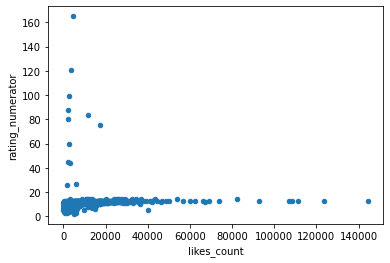

In [85]:
df_final.plot.scatter(x='likes_count', y='rating_numerator')

In [86]:
df_final.query('rating_numerator < 20 ').likes_count.var(), df_final.query('rating_numerator > 20').likes_count.var()

(137277488.36564305, 22487925.818181816)

Puisqu'on a des variances differentes entre les numerateur > 20 et < 20, on etudiera uniquement la correlation pour les tweets ayant des numerateur < 20.

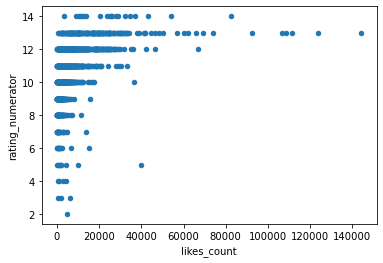

In [87]:
less_rating_df = df_final.query('rating_numerator < 20')
less_rating_df.plot.scatter(x='likes_count', y='rating_numerator')
plt.savefig(FIGURES_FOLDER_NAME+"/scatter_rating_likes.jpg")

In [88]:
less_rating_df['likes_count'].corr(less_rating_df['rating_numerator'])

0.4260988026175523

D'après cet echantillon on remarque qu'il y a une correlation faible entre la note des chiens et le nombre des likes.
Vérifions si on a une correlation ou pas entre les deux variable avec un test statistique.
L'hypthèse nulle de ce test est : H0 = Il n y a aucune correlation entre les deux variables.

In [89]:
# alpha = 0.05
stats.pearsonr(x=df_final['likes_count'], y=df_final['rating_numerator'])

PearsonRResult(statistic=0.08232407134909872, pvalue=0.0017490450740226939)

p value est < alpha, donc on rejette l'hypthese nulle.

#### Comparer les moyennes des likes de pupper et doggo

In [90]:
df_final.query('stage == "pupper"').shape[0], df_final.query('stage == "doggo"').shape[0]

(160, 49)

outliers number : 5
outliers number : 22
sample size : 44
ratio of the diffrence between variances = 4.413977883685414


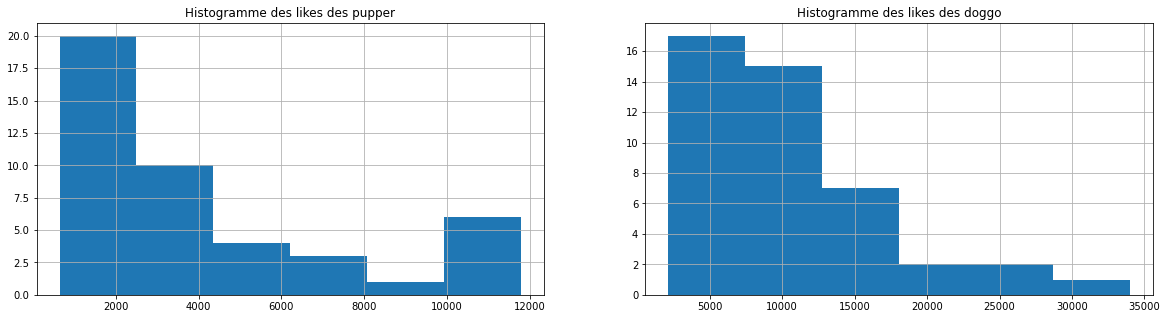

In [91]:
def remove_outlier(column):
    Q1 , Q3 = column.quantile(0.25), column.quantile(0.75)
    IQ = Q3 - Q1
    max = Q3 + (1.5*IQ)
    min = Q1 - (1.5*IQ)
    print(f'outliers number : {len(column[(column > max) | (column < min)])}')
    return column[(column <= max) & (column >=min)]



# we're going to use two samples with the same sample size
doggo_likes = remove_outlier(df_final.query('stage == "doggo"').likes_count)
pupper_likes = remove_outlier(df_final.query('stage == "pupper"').likes_count)

sample_size = min(len(doggo_likes), len(pupper_likes))
print(f"sample size : {sample_size}") # make sure that sample size > 30
pupper_likes = pupper_likes.sample(sample_size, random_state=0)

# is the sample size large enough to assume normality
# check variance equality
print(f'ratio of the diffrence between variances = {doggo_likes.var() / pupper_likes.var()}')

bins = int(round(1 + math.log2(sample_size), 0)) # sturges rule
fig, axs = plt.subplots(1, 2)
fig1 = pupper_likes.hist(ax = axs[0], bins=bins, figsize=(20,5))
fig1.set_title("Histogramme des likes des pupper")
fig2 = doggo_likes.hist(ax = axs[1], bins=bins, figsize=(20,5))
fig2.set_title("Histogramme des likes des doggo")
plt.savefig(FIGURES_FOLDER_NAME+"/pupper_doggo_hist.jpg")


In [92]:
doggo_likes.mean(), pupper_likes.mean()

(10853.636363636364, 4105.613636363636)

On aimerait bien savoir si la moyenne des likes des doggo est bien superieur à la moyenne des likes des pupper, pour ceci on effectuera un `One tail 2 sample test`, avec l'hypothèse nulle  : H0 = moyenne likes pupper > moyenne likes doggo

In [93]:
# we set alpha = 0.05
stats.ttest_ind(a=pupper_likes, b=doggo_likes, equal_var=False, alternative='less')

Ttest_indResult(statistic=-5.810898458223567, pvalue=1.1833410514578403e-07)

On a obtenu une p valeur <> alpha donc on rejette l'hypthèse nulle. On peut conclure que la moyenne des likes des doggo est supérieur à la moyenne des likes des pupper.

#### Comparer la moyenne des likes des chiens (Golden retriever et Chihuahua)

In [94]:
high_confidence_df = df_final.query("p1_conf > 0.5")
high_confidence_df.shape

(915, 22)

(112,) (45,)


<AxesSubplot:>

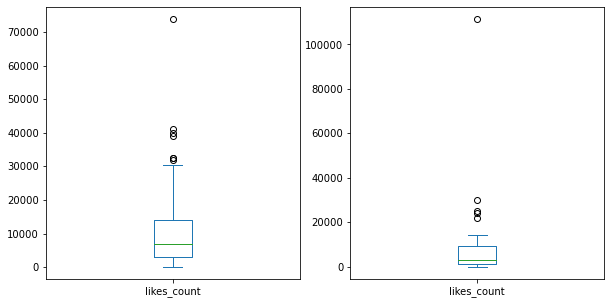

In [95]:
golden_retriever_likes = high_confidence_df.query('p1 == "golden_retriever"').likes_count
chihuahua_likes = high_confidence_df.query('p1 == "Chihuahua"').likes_count

print(golden_retriever_likes.shape, chihuahua_likes.shape)

fig, axs = plt.subplots(1, 2)
golden_retriever_likes.plot.box(ax = axs[0], figsize=(10,5))
chihuahua_likes.plot.box(ax = axs[1])


outliers number : 7
outliers number : 5
sample size : 40
ratio of the difference between variances = 0.3306699948786356


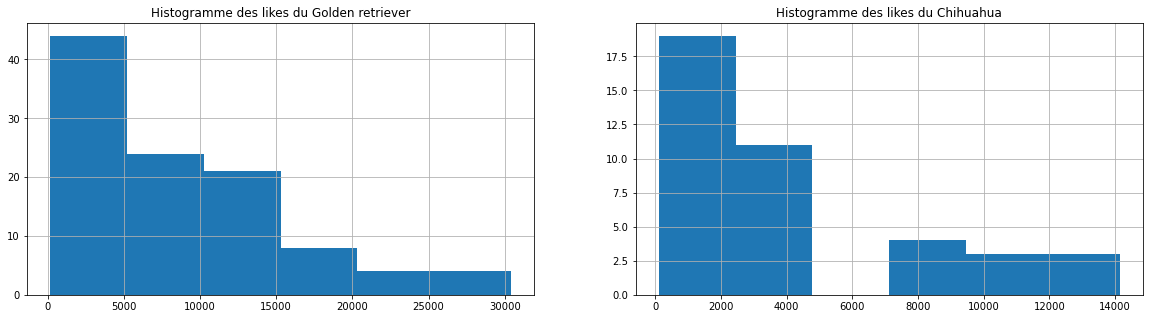

In [96]:
golden_retriever_likes = remove_outlier(golden_retriever_likes)
chihuahua_likes = remove_outlier(chihuahua_likes)


sample_size = min(len(golden_retriever_likes), len(chihuahua_likes))
print(f"sample size : {sample_size}")

# is the sample size large enough to assume normality
# check variance equality
print(f'ratio of the difference between variances = {chihuahua_likes.var() / golden_retriever_likes.var() }')


bins = int(round(1 + math.log2(sample_size), 0)) # sturges rule
fig, axs = plt.subplots(1, 2)
fig1 = golden_retriever_likes.hist(ax = axs[0], bins=bins, figsize=(20,5))
fig1.set_title("Histogramme des likes du Golden retriever")
fig2 = chihuahua_likes.hist(ax = axs[1], bins=bins)
fig2.set_title("Histogramme des likes du Chihuahua")
plt.savefig(FIGURES_FOLDER_NAME+"/golden_chihuahua_hist.jpg")



In [97]:
golden_retriever_likes.mean(), chihuahua_likes.mean()

(8580.819047619048, 4162.075)

In [98]:
# alpha = 0.05
# H0 = chihuahua likes > golden retiever likes
stats.ttest_ind(a=chihuahua_likes, b=golden_retriever_likes, equal_var=False, alternative='less')

Ttest_indResult(statistic=-4.51815631257344, pvalue=7.326525009751776e-06)

la valeur de p est < 0.05 donc on rejette l'hypthese nulle.

### l'interval de confiance de la moyenne des notes du golden retriever

In [99]:
mu = golden_retriever_likes.mean()
sigma = golden_retriever_likes.std()

stats.norm.interval(0.95, loc = mu, scale = sigma)

(-5790.309801240312, 22951.947896478407)

l'interval de confiance de la moyenne des likes du golden retiever est entre 0 et 22951.9

### Insights:
1. Il existe une faible correlation entre le nombre de likes et la note des chiens

2. La moyenne des nombres de likes des chiens "doggo" est plus grande que celle des chiens "pupper"

3. la moyenne des likes des chiens golden retriever est plus elevé que celle du chihuahua.

### Visualization

In [100]:
# visialize top 10 most likable dogs for 2017
most_likeable_dogs = high_confidence_df.groupby('p1')['likes_count'].median().sort_values(ascending=False)[:10]
most_likeable_dogs

p1
Saluki                     24079.0
Irish_water_spaniel        21575.0
Afghan_hound               14718.0
black-and-tan_coonhound    14630.0
Newfoundland               13704.0
Irish_setter               13655.5
Tibetan_mastiff            12944.0
Great_Pyrenees             11302.0
briard                     10916.5
bloodhound                 10513.0
Name: likes_count, dtype: float64

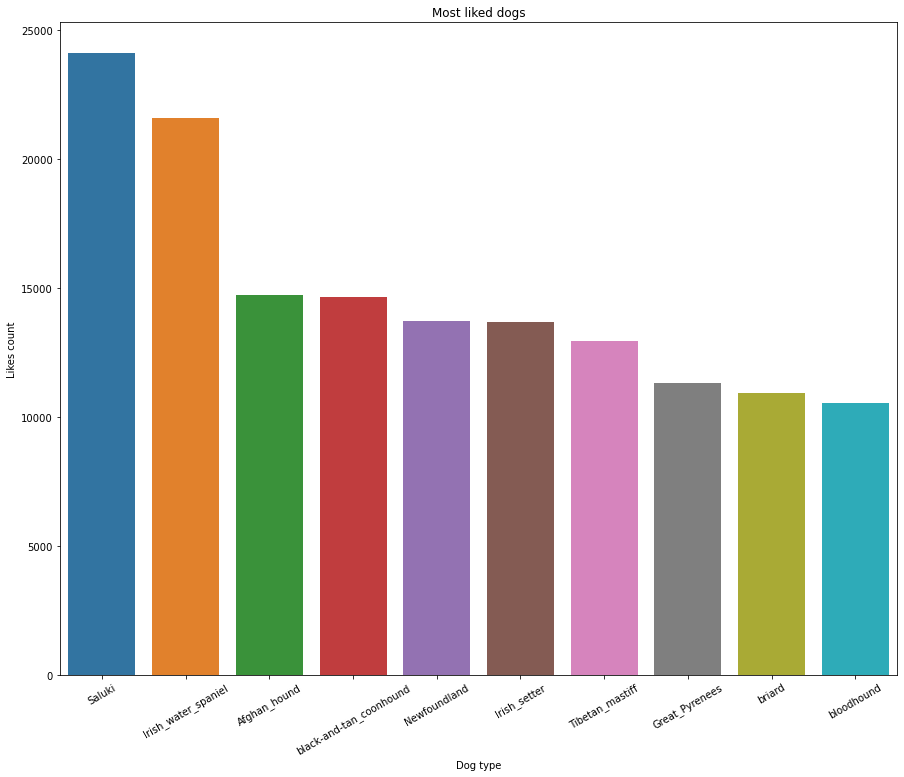

In [101]:
plt.figure(figsize=(15, 12))
fig = sns.barplot(x= most_likeable_dogs.index, y = most_likeable_dogs.values)
fig.set_xlabel("Dog type")
fig.set_ylabel("Likes count")
fig.set_title("Most liked dogs")
plt.xticks(rotation=30)

plt.savefig(FIGURES_FOLDER_NAME+"/most_liked_dogs.jpg")